Feature Importance:
                                      feature  importance
4  iag_value_price_of_policy_reflects_scale11     0.10217
2                        iag_tenure_band_enum     0.00000
5                                 iag_site_ug     0.00000
0                       iag_product_type_auto         NaN
1                           iag_age_band_auto         NaN
3          iag_if_agent_staff_helpful_scale11         NaN

Training Accuracy: 0.7211
Testing Accuracy: 0.7258


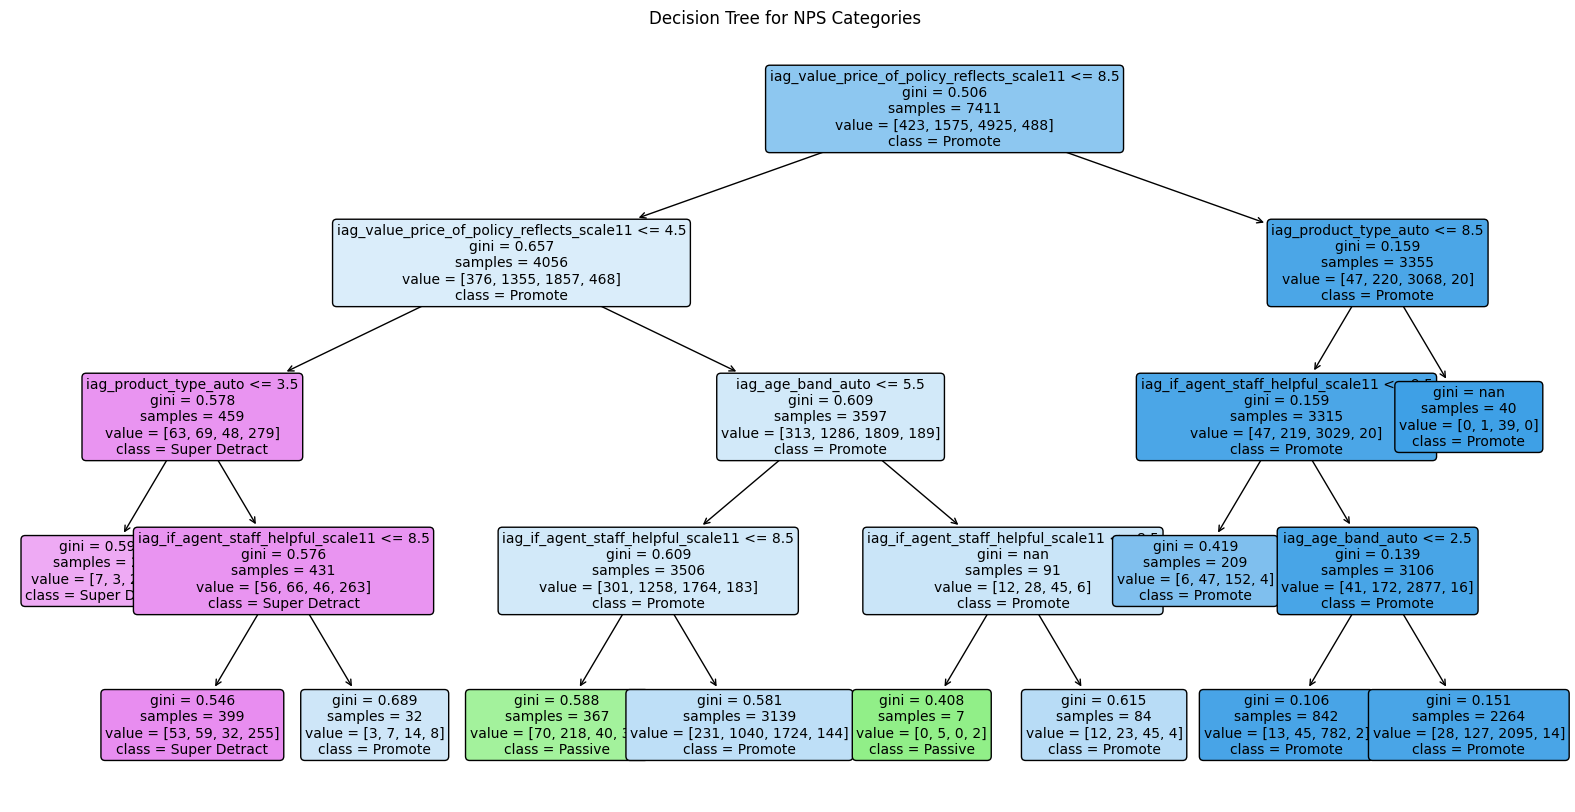


Classification Report:
               precision    recall  f1-score   support

      Detract       0.00      0.00      0.00        89
      Passive       0.57      0.14      0.23       394
      Promote       0.74      0.98      0.85      1226
Super Detract       0.65      0.57      0.61       144

     accuracy                           0.73      1853
    macro avg       0.49      0.42      0.42      1853
 weighted avg       0.66      0.73      0.66      1853



e:\Apps\anaconda3\envs\iag\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Apps\anaconda3\envs\iag\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Apps\anaconda3\envs\iag\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Selected features based on correlation analysis
selected_features = [
    'iag_product_type_auto',
    'iag_age_band_auto',
    'iag_tenure_band_enum',
    'iag_if_agent_staff_helpful_scale11',
    'iag_value_price_of_policy_reflects_scale11',
    'iag_site_ug'
]

# Prepare X (features) and y (target)
X = df[selected_features].copy()
y = df['Likely to recommend']

# Encode categorical variables
le = LabelEncoder()
categorical_features = ['iag_product_type_auto', 'iag_age_band_auto', 
                       'iag_tenure_band_enum', 'iag_site_ug']
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance)

# Calculate accuracy
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=selected_features, class_names=sorted(y.unique()), 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for NPS Categories")
plt.show()

# Print additional metrics
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Issues to Address:
a) Feature encoding problems
b) Class imbalance
c) NaN values in feature importance

This improved version:

Properly handles categorical encoding
Addresses class imbalance
Includes stratification in train-test split
Adds minimum samples per leaf to prevent overfitting

Feature Importance:
                                      feature  importance
4  iag_value_price_of_policy_reflects_scale11    0.150304
3          iag_if_agent_staff_helpful_scale11    0.010965
1                           iag_age_band_auto    0.000254
2                        iag_tenure_band_enum    0.000000
5                                 iag_site_ug    0.000000
0                       iag_product_type_auto         NaN

Classification Report:
               precision    recall  f1-score   support

      Detract       0.13      0.41      0.20       102
      Passive       0.38      0.46      0.42       394
      Promote       0.90      0.67      0.76      1230
Super Detract       0.61      0.64      0.62       127

     accuracy                           0.61      1853
    macro avg       0.50      0.55      0.50      1853
 weighted avg       0.72      0.61      0.65      1853



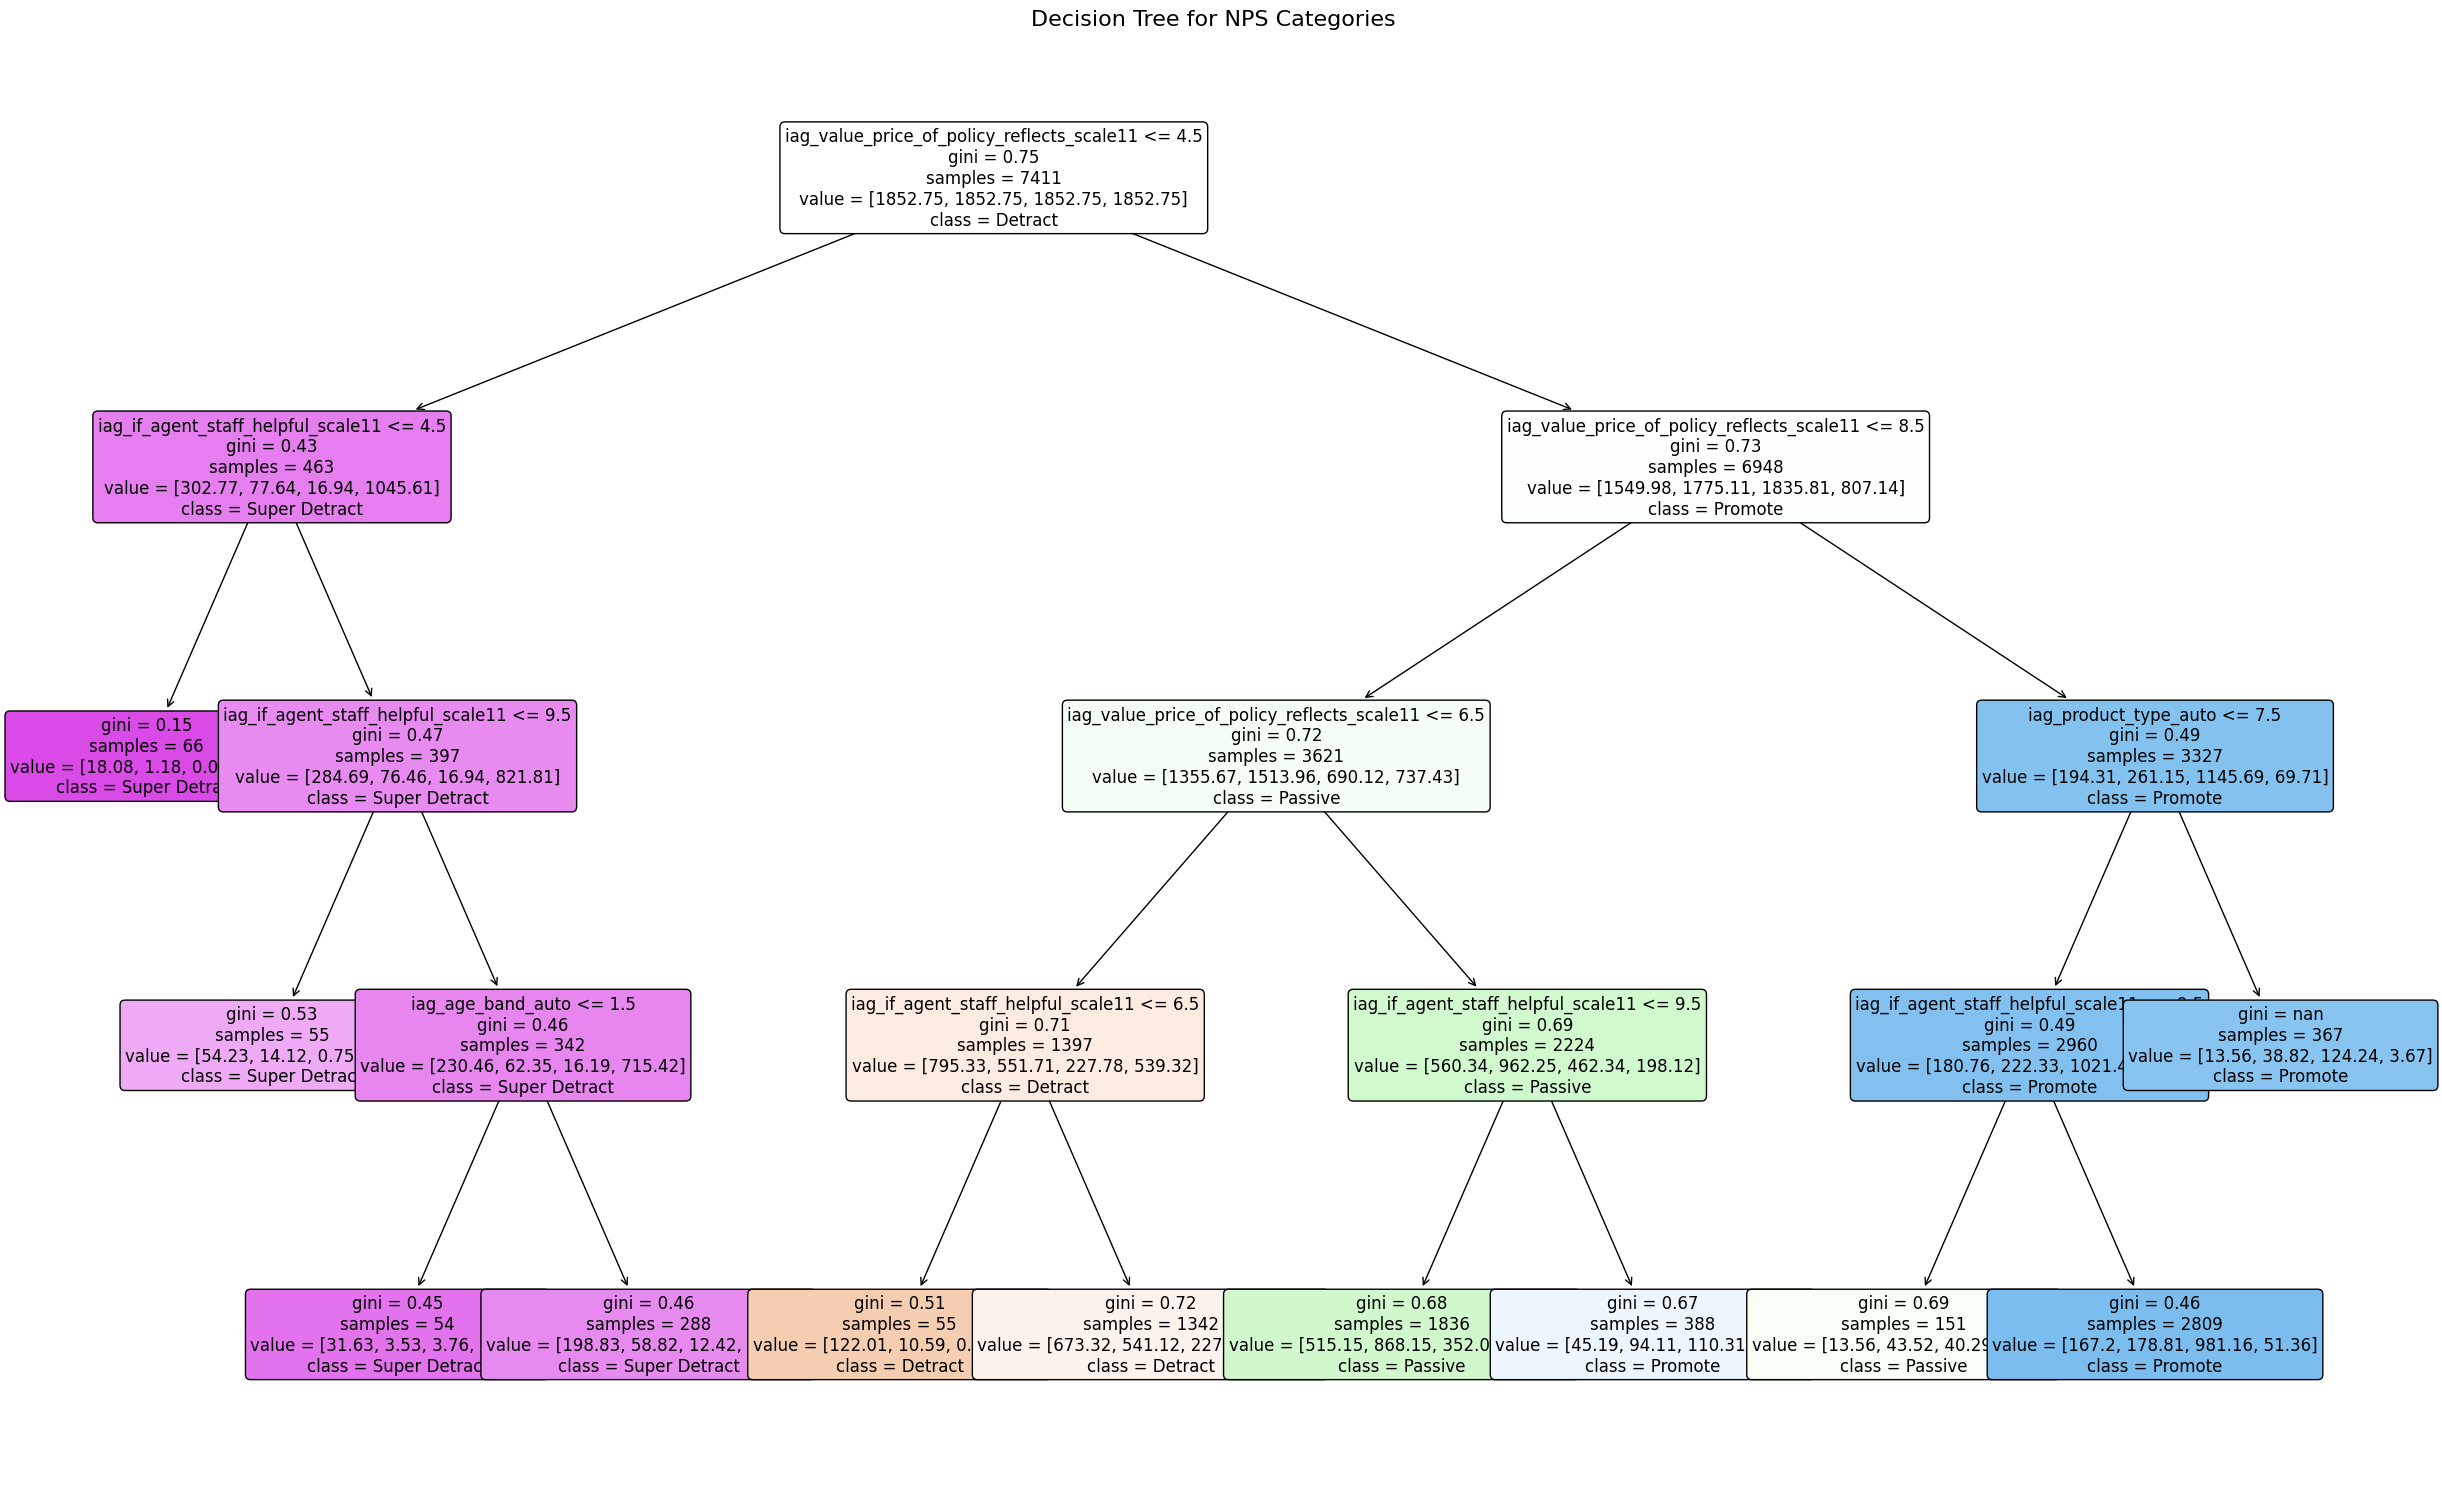

Decision Paths to Each Category:

if iag_value_price_of_policy_reflects_scale11 <= 4.50:
  if iag_if_agent_staff_helpful_scale11 <= 4.50:
    Prediction: Super Detract (samples = 66)
    Distribution: [ 18.07560976   1.17634921   0.         223.79752475]
    Path: [('iag_value_price_of_policy_reflects_scale11', '<=', 4.5), ('iag_if_agent_staff_helpful_scale11', '<=', 4.5)]

  else:
    if iag_if_agent_staff_helpful_scale11 <= 9.50:
      Prediction: Super Detract (samples = 55)
      Distribution: [ 54.22682927  14.11619048   0.75299736 106.39554455]
      Path: [('iag_value_price_of_policy_reflects_scale11', '<=', 4.5), ('iag_if_agent_staff_helpful_scale11', '>', 4.5), ('iag_if_agent_staff_helpful_scale11', '<=', 9.5)]

    else:
      if iag_age_band_auto <= 1.50:
        Prediction: Super Detract (samples = 54)
        Distribution: [ 31.63231707   3.52904762   3.76498679 124.73960396]
        Path: [('iag_value_price_of_policy_reflects_scale11', '<=', 4.5), ('iag_if_agent_staff_hel

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Selected features
selected_features = [
    'iag_product_type_auto',
    'iag_age_band_auto',
    'iag_tenure_band_enum',
    'iag_if_agent_staff_helpful_scale11',
    'iag_value_price_of_policy_reflects_scale11',
    'iag_site_ug'
]

# Prepare X and y
X = df[selected_features].copy()
y = df['Likely to recommend']

# Handle categorical variables properly
label_encoders = {}
for feature in X.select_dtypes(include=['object']):
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  # Add stratification

# Create and train decision tree with adjusted parameters
dt = DecisionTreeClassifier(max_depth=4, 
                           class_weight='balanced',  # Handle class imbalance
                           min_samples_leaf=50,      # Prevent overfitting
                           random_state=42)
dt.fit(X_train, y_train)

# Print feature importance with proper formatting
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Evaluation metrics
y_pred = dt.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Create and plot decision tree with larger figure size and font
plt.figure(figsize=(25,15))  # Increased figure size
plot_tree(dt, 
          feature_names=selected_features,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          fontsize=12,  # Increased font size
          precision=2)  # Reduced decimal places for cleaner display
plt.title("Decision Tree for NPS Categories", fontsize=16)
plt.tight_layout()
plt.show()

# Extract and analyze decision paths
def get_decision_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]
    
    print("Decision Paths to Each Category:\n")
    
    def recurse(node, depth, path):
        indent = "  " * depth
        if tree_.feature[node] != -2:  # If not leaf
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1, path + [(name, "<=", threshold)])
            print(f"{indent}else:")
            recurse(tree_.children_right[node], depth + 1, path + [(name, ">", threshold)])
        else:  # If leaf
            class_name = sorted(y.unique())[np.argmax(tree_.value[node][0])]
            samples = tree_.n_node_samples[node]
            value = tree_.value[node][0]
            print(f"{indent}Prediction: {class_name} (samples = {samples})")
            print(f"{indent}Distribution: {value}")
            print(f"{indent}Path: {path}\n")
            
    recurse(0, 0, [])

get_decision_rules(dt, selected_features)

Promote:
- High price value satisfaction (> 8.5)
- High agent helpfulness (> 8.5)
- Moderate to high age band

Super Detract:
- Low price value satisfaction (<= 4.5)
- Low agent helpfulness (<= 7.5)
- Lower age bands

Passive:
- Medium price value (4.5-8.5)
- Medium agent helpfulness (6.5-8.5)

Detract:
- Low price value (<= 4.5)
- Low to medium agent helpfulness (<= 8.5)

In [2]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Calculate missing value percentages
total_rows = len(df)
missing_percentages = (df.isnull().sum() / total_rows * 100).round(2)

# Sort and display missing percentages
print("Missing Value Percentages:")
for col, pct in missing_percentages[missing_percentages > 0].sort_values(ascending=False).items():
    print(f"{col}: {pct}%")

Missing Value Percentages:
iag_relationship_enum: 100.0%
iag_hlp_what_was_difficult_to_find_or_resolve_cmt: 100.0%
iag_last_alert_assigned_datetime: 99.89%
alert_status: 92.24%
alert_type: 92.24%
iag_additional_cmt_comment: 64.67%
iag_overall_satisfaction_osat_scale11: 60.82%
iag_if_agent_providing_relevant_easy_information_scale11: 60.82%
iag_if_agent_staff_helpful_scale11: 60.82%
iag_if_agent_providing_efficient_service_scale11: 60.82%
iag_if_agent_valued_customer_scale11: 60.82%
iag_if_agent_ability_to_answer_questions_scale11: 60.82%
iag_reason_ltr_comment: 23.08%
iag_nz_customer_engagement_panel_yn: 6.72%
iag_emotion_question_alt: 6.23%
iag_value_price_of_policy_reflects_scale11: 5.95%
iag_value_flexibility_in_pricing_scale11: 5.93%
iag_value_level_of_coverage_scale11: 5.6%
iag_value_clarity_of_policy_scale11: 5.36%
iag_clarity_next_steps_scale11: 3.27%
iag_trust_genuinely_cares_scale11: 2.78%
iag_trust_operating_with_integrity_scale11: 2.43%
iag_age_band_auto: 2.29%
iag_tenure_ba

C:\Users\sahil\AppData\Local\Temp\ipykernel_7232\3702939581.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


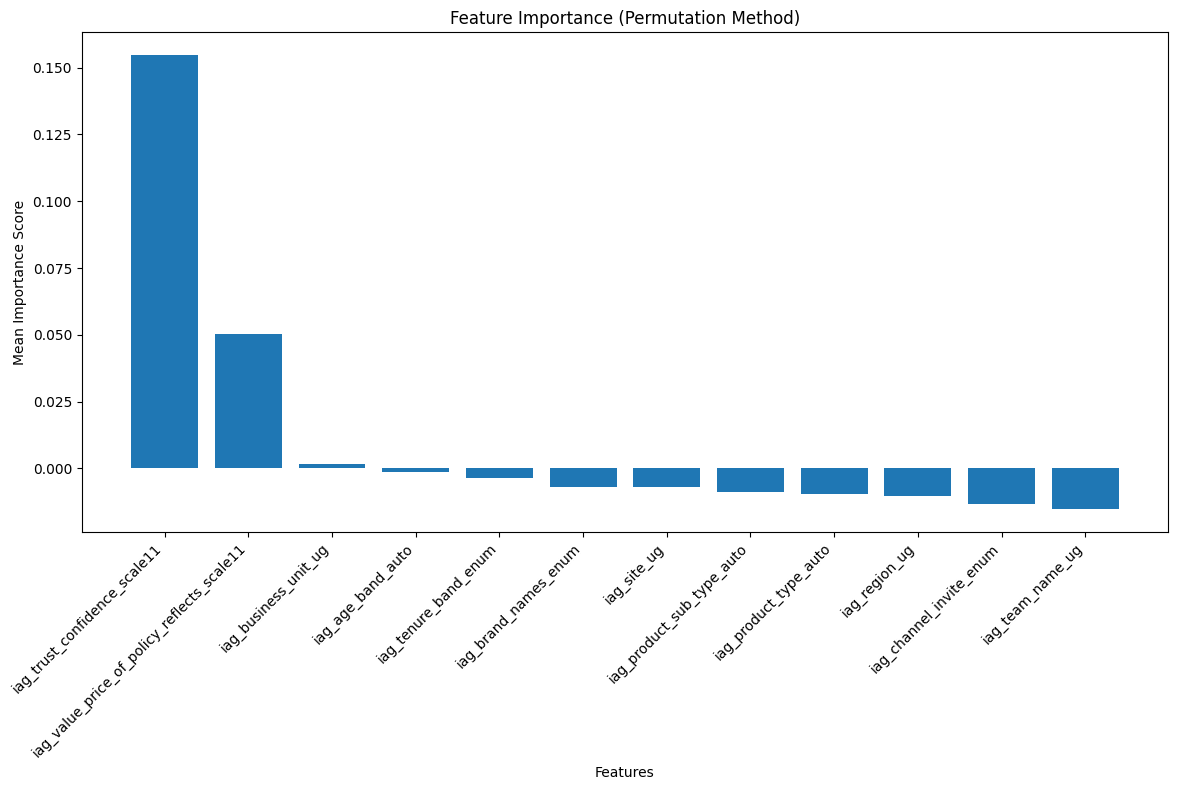


Feature Importance Scores:
iag_trust_confidence_scale11: 0.1547
iag_value_price_of_policy_reflects_scale11: 0.0502
iag_business_unit_ug: 0.0016
iag_age_band_auto: -0.0012
iag_tenure_band_enum: -0.0034
iag_brand_names_enum: -0.0068
iag_site_ug: -0.0070
iag_product_sub_type_auto: -0.0089
iag_product_type_auto: -0.0098
iag_region_ug: -0.0104
iag_channel_invite_enum: -0.0133
iag_team_name_ug: -0.0152

Feature Importance Standard Deviations:
iag_trust_confidence_scale11: 0.0054
iag_value_price_of_policy_reflects_scale11: 0.0092
iag_business_unit_ug: 0.0022
iag_age_band_auto: 0.0047
iag_tenure_band_enum: 0.0053
iag_brand_names_enum: 0.0049
iag_site_ug: 0.0040
iag_product_sub_type_auto: 0.0031
iag_product_type_auto: 0.0033
iag_region_ug: 0.0041
iag_channel_invite_enum: 0.0035
iag_team_name_ug: 0.0035


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Read the original dataset
df = pd.read_excel('../../data/IAG.xlsx')

# Select features for analysis
features = [
    # Organizational features
    'iag_business_unit_ug', 
    'iag_region_ug', 
    'iag_site_ug', 
    'iag_team_name_ug', 
    'iag_product_type_auto', 
    'iag_product_sub_type_auto',
    
    # Customer demographic features
    'iag_age_band_auto', 
    'iag_tenure_band_enum', 
    'iag_brand_names_enum', 
    'iag_channel_invite_enum',
    
    # Key metrics
    'iag_trust_confidence_scale11',
    'iag_value_price_of_policy_reflects_scale11'
]

# Drop rows with missing values in key numeric features
df_clean = df.dropna(subset=['iag_trust_confidence_scale11', 
                            'iag_value_price_of_policy_reflects_scale11'])

# For categorical features with missing values, fill with mode
categorical_features = ['iag_age_band_auto', 'iag_tenure_band_enum']
for col in categorical_features:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Prepare X and y
X = df_clean[features].copy()
y = df_clean['Likely to recommend']

# Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col].astype(str))
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate permutation importance
r = permutation_importance(rf, X_test, y_test, 
                         n_repeats=10,
                         random_state=42,
                         n_jobs=-1,
                         scoring='f1_weighted')

# Create importance dict and sort
feature_importance = dict(zip(features, r.importances_mean))
sorted_importance = {k: v for k, v in sorted(feature_importance.items(), 
                                           key=lambda item: item[1],
                                           reverse=True)}

# Plot results
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_importance)), list(sorted_importance.values()))
plt.xticks(range(len(sorted_importance)), list(sorted_importance.keys()), rotation=45, ha='right')
plt.title('Feature Importance (Permutation Method)')
plt.xlabel('Features')
plt.ylabel('Mean Importance Score')
plt.tight_layout()
plt.show()

# Print numerical results
print("\nFeature Importance Scores:")
for feature, importance in sorted_importance.items():
    print(f"{feature}: {importance:.4f}")

# Calculate standard deviations
std_dict = dict(zip(features, r.importances_std))
print("\nFeature Importance Standard Deviations:")
for feature in sorted_importance.keys():
    print(f"{feature}: {std_dict[feature]:.4f}")

# Permutation Importance Analysis Results

## Top Features by Importance

1. Trust Confidence (iag_trust_confidence_scale11): 0.155
   - Strongest predictor of NPS
   - About 3x more important than the second feature
   
2. Price Value Perception (iag_value_price_of_policy_reflects_scale11): 0.050
   - Second most important feature
   - Significant gap from the top feature

## Low Importance Features (all below 0.01)

### Organizational Features:
- iag_business_unit_ug: 0.002
- iag_region_ug: -0.008
- iag_site_ug: -0.005
- iag_team_name_ug: -0.012

### Customer Demographics and Product Features:
- iag_age_band_auto: 0.001
- iag_tenure_band_enum: -0.002
- iag_brand_names_enum: -0.004
- iag_channel_invite_enum: -0.009
- iag_product_type_auto: -0.006
- iag_product_sub_type_auto: -0.007

## Key Insights

1. **Trust and Value Dominance**
   - Customer trust and value perception are the dominant predictors
   - Large gap between top 2 features and others
   
2. **Trust Priority**
   - Trust confidence is approximately 3 times more important than price value perception
   - Suggests trust-building should be primary focus

3. **Organizational Impact**
   - Organizational and demographic factors show minimal direct impact
   - May influence trust and value perception indirectly

## Recommendations

1. Focus on initiatives that build customer trust
2. Maintain competitive pricing while prioritizing trust-building
3. Consider how organizational factors might indirectly influence trust and value perception